# Data Exploration

## Visualisation

### Learning objectives


Visualising data is a crutial step of data exploration phase, many hidden patterns of data can be identified whith graphs and charts. There are four groups of charts we can use while exploring data
* Comparison graphs: Ex Boxplot
* Relationship graphs: Ex Scratter plot
* Distribution graphs: Histogram
* Composition graphs: Ex Bar chart, Stacked bar chart, Pie chart

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
supermarkets = pd.read_csv("../data/detailed_supermarket_sales.csv")

In [3]:
supermarkets.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Dates,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,569dac1b,C,Naypyitaw,Normal,Male,Electronic accessories,55.10,1,2.7550,57.8550,2024-01-25,23:31:33,Cash,55.10,4.761905,2.7550,4.8
1,8822a33d,A,Naypyitaw,Normal,Female,Sports and travel,73.56,8,29.4240,617.9040,2024-07-09,11:10:17,Credit card,588.48,4.761905,29.4240,8.5
2,b623fb46,C,Naypyitaw,Member,Male,Electronic accessories,58.09,4,11.6180,243.9780,2024-05-05,01:25:30,Cash,232.36,4.761905,11.6180,7.9
3,5c7b5576,C,Naypyitaw,Normal,Female,Food and beverages,58.67,5,14.6675,308.0175,2024-08-21,09:36:15,Cash,293.35,4.761905,14.6675,5.9
4,d1241256,A,Yangon,Member,Male,Health and beauty,48.66,8,19.4640,408.7440,2024-04-20,02:22:53,Credit card,389.28,4.761905,19.4640,7.7


### Set up the aesthetics for the plots

In [4]:
sns.set(style="whitegrid")

## Comparison Graph: Boxplot

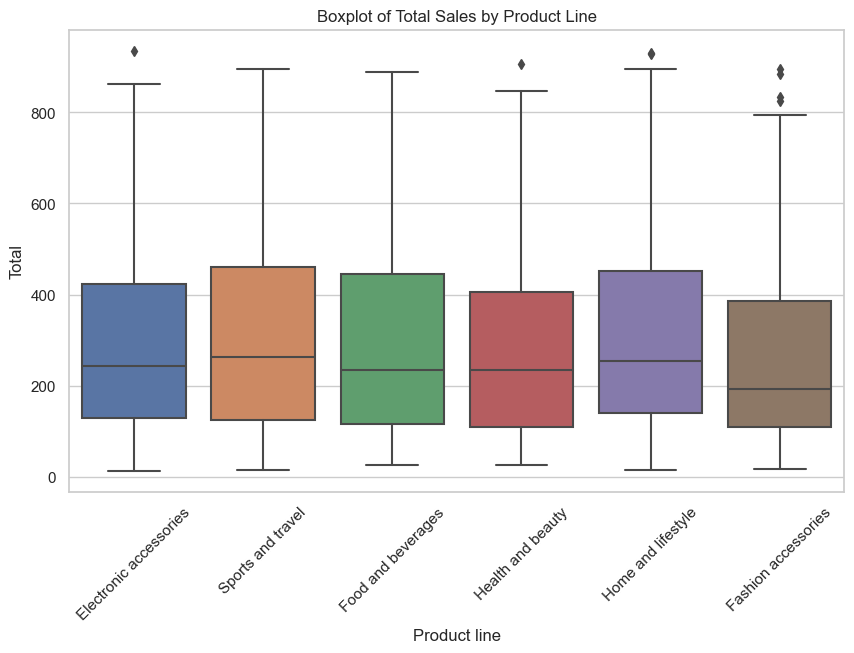

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Total', data=supermarkets)
plt.title('Boxplot of Total Sales by Product Line')
plt.xticks(rotation=45)
plt.show()

## Relationship Graph: Scatter plot

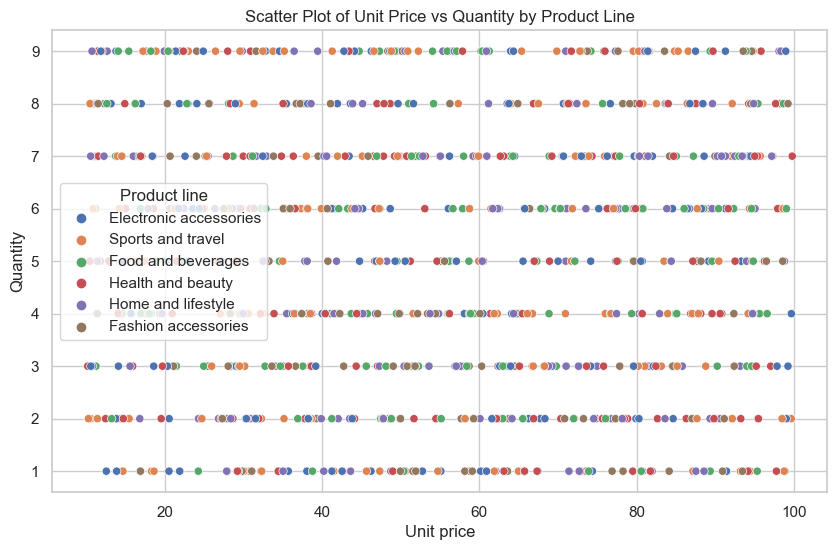

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unit price', y='Quantity', hue='Product line', data=supermarkets)
plt.title('Scatter Plot of Unit Price vs Quantity by Product Line')
plt.show()

## Distribution Graph: Histogram

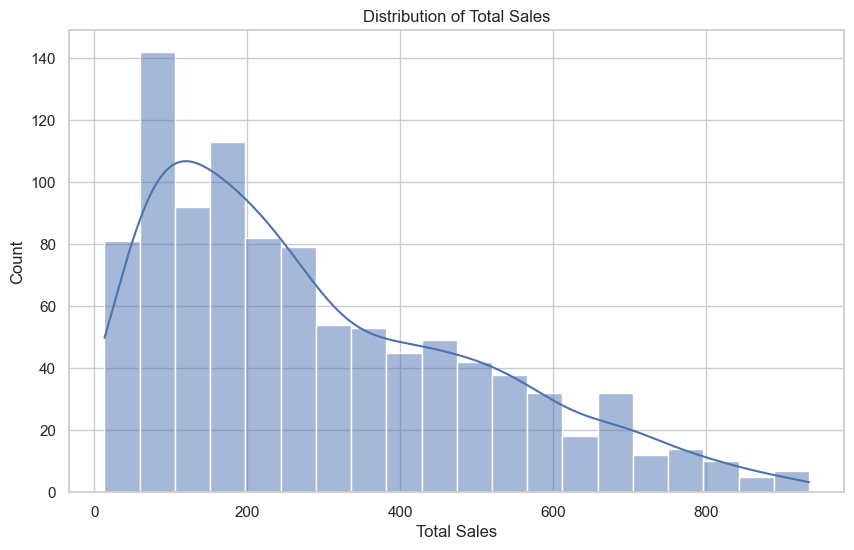

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(supermarkets['Total'], bins=20, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.show()

## Composition Graph: Bar chart

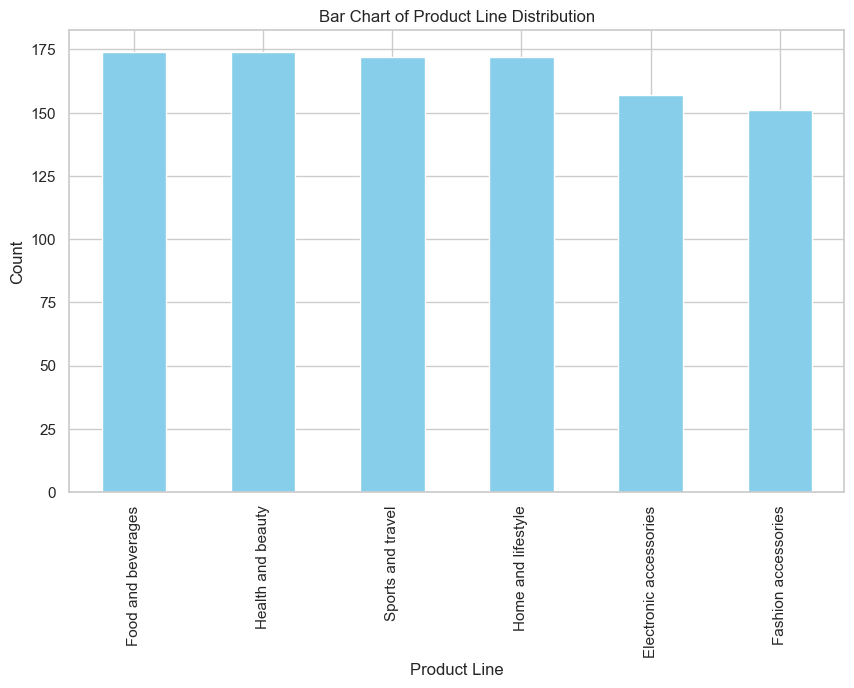

In [8]:
plt.figure(figsize=(10, 6))
supermarkets['Product line'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.show()

## Composition Graph: Stacked Bar chart

<Figure size 1000x600 with 0 Axes>

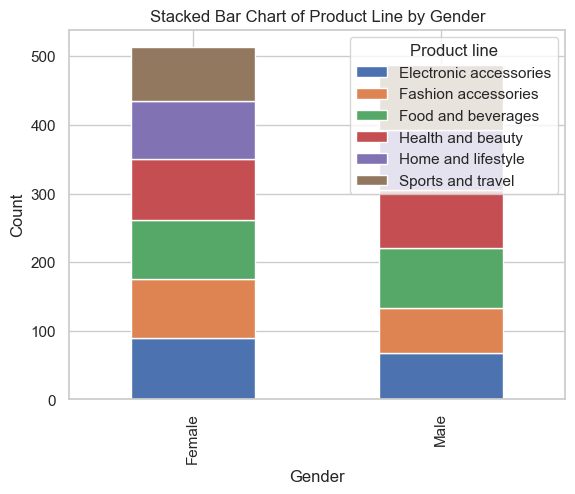

In [9]:
plt.figure(figsize=(10, 6))
supermarkets.groupby(['Gender', 'Product line']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Product Line by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Composition Graph: Pie chart

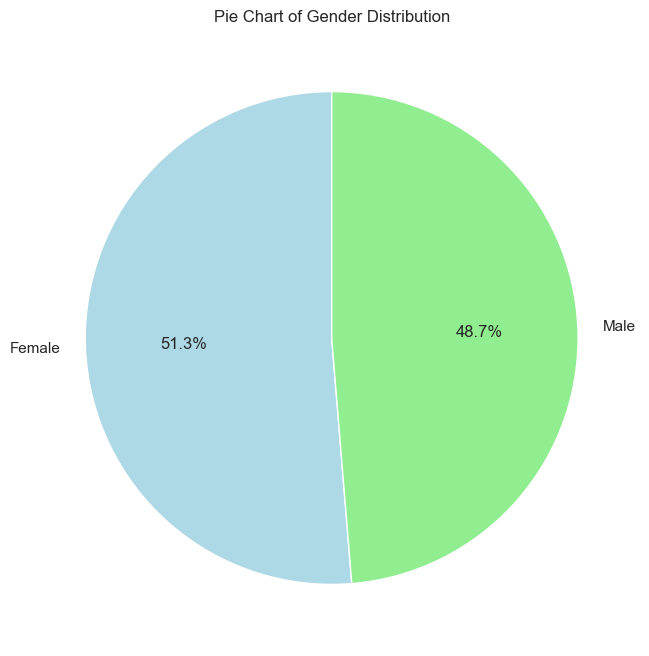

In [10]:
plt.figure(figsize=(8, 8))
supermarkets['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of Gender Distribution')
plt.ylabel('')
plt.show()

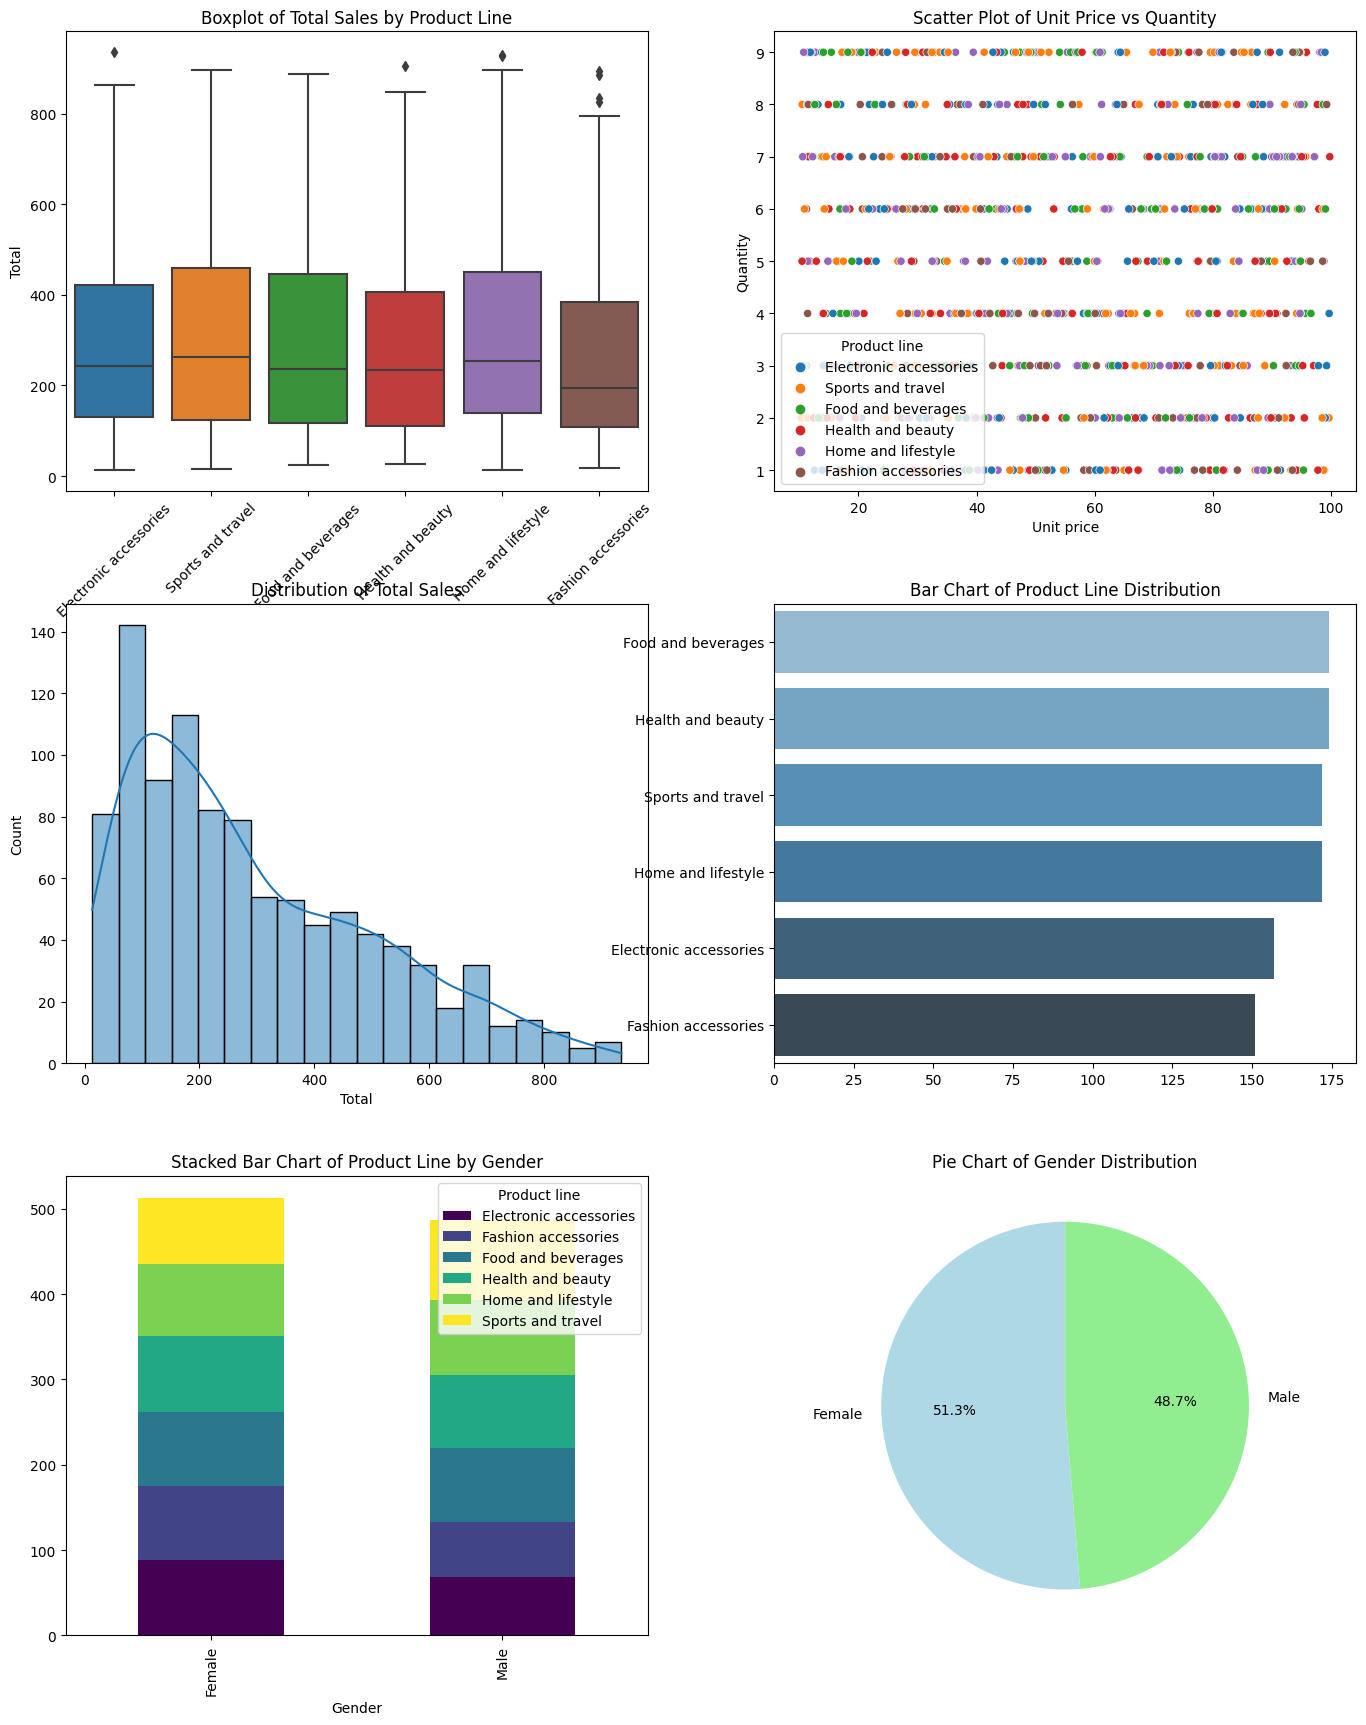

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
supermarket = pd.read_csv('../data/detailed_supermarket_sales.csv')

# Create a figure for subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))  # 3 rows and 2 columns of subplots
fig.tight_layout(pad=6.0)

# 1. Boxplot: Total Sales by Product Line
sns.boxplot(ax=axes[0, 0], data=supermarket, x='Product line', y='Total')
axes[0, 0].set_title('Boxplot of Total Sales by Product Line')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Scatter plot: Unit Price vs Quantity by Product Line
sns.scatterplot(ax=axes[0, 1], data=supermarket, x='Unit price', y='Quantity', hue='Product line')
axes[0, 1].set_title('Scatter Plot of Unit Price vs Quantity')

# 3. Histogram: Distribution of Total Sales
sns.histplot(ax=axes[1, 0], data=supermarket, x='Total', bins=20, kde=True)
axes[1, 0].set_title('Distribution of Total Sales')

# 4. Bar chart: Product Line Distribution
product_line_counts = supermarket['Product line'].value_counts()
sns.barplot(ax=axes[1, 1], x=product_line_counts.values, y=product_line_counts.index, palette='Blues_d')
axes[1, 1].set_title('Bar Chart of Product Line Distribution')

# 5. Stacked Bar Chart: Product Line by Gender
gender_product_counts = supermarket.groupby(['Gender', 'Product line']).size().unstack().fillna(0)
gender_product_counts.plot(kind='bar', stacked=True, ax=axes[2, 0], colormap='viridis')
axes[2, 0].set_title('Stacked Bar Chart of Product Line by Gender')

# 6. Pie chart: Gender Distribution
gender_counts = supermarket['Gender'].value_counts()
axes[2, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
axes[2, 1].set_title('Pie Chart of Gender Distribution')

# Show the plots
plt.show()
